# Lean Six Sigma
## Author: Snigdhayan Mahanta

`Lean Six Sigma` is a well established process improvement methodology. Suppose a company manufactures several products at various locations and it is interested in improving the quality (e.g., reducing the number of defects in the manufactured products). There are several `Lean Six Sigma` tools that it can use to visualize and control the process. I created a curated dataset for this purpose and illustrated some of the tools below.

In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create a population of product data
population_size = 10000
n_products = 3 # number of distinct products
location <- sample(c("Germany", "France", "Spain", "Italy"), population_size, replace = TRUE, prob = c(0.3, 0.4, 0.2, 0.1))
defects <- round(abs(rnorm(population_size, mean = 800, sd = 500)))
quantity <- 1000*defects + round(abs(rnorm(population_size, mean = 50000, sd = 100000)))
stockcode <- round(sample(1:n_products, population_size, replace = TRUE))
stockcode <- paste("P", stockcode, sep="")
df <- data.frame("StockCode" = stockcode, "Quantity" = quantity, "Defects" = defects, "Location" = location)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,StockCode,Quantity,Defects,Location
,<fct>,<dbl>,<dbl>,<fct>
3999,P1,752580,660,Spain
6065,P2,1603818,1533,Spain
5133,P2,1354739,1228,France
2437,P3,617018,608,France
7666,P2,1207180,1085,Germany
3776,P3,529861,337,France
5298,P2,878220,698,Italy
5193,P3,665556,450,Germany
626,P2,200672,73,Germany


    
Pareto chart analysis for defectCount
       Frequency   Cum.Freq.  Percentage Cum.Percent.
  P3 27505.00000 27505.00000    36.61475     36.61475
  P2 24379.00000 51884.00000    32.45341     69.06816
  P1 23236.00000 75120.00000    30.93184    100.00000

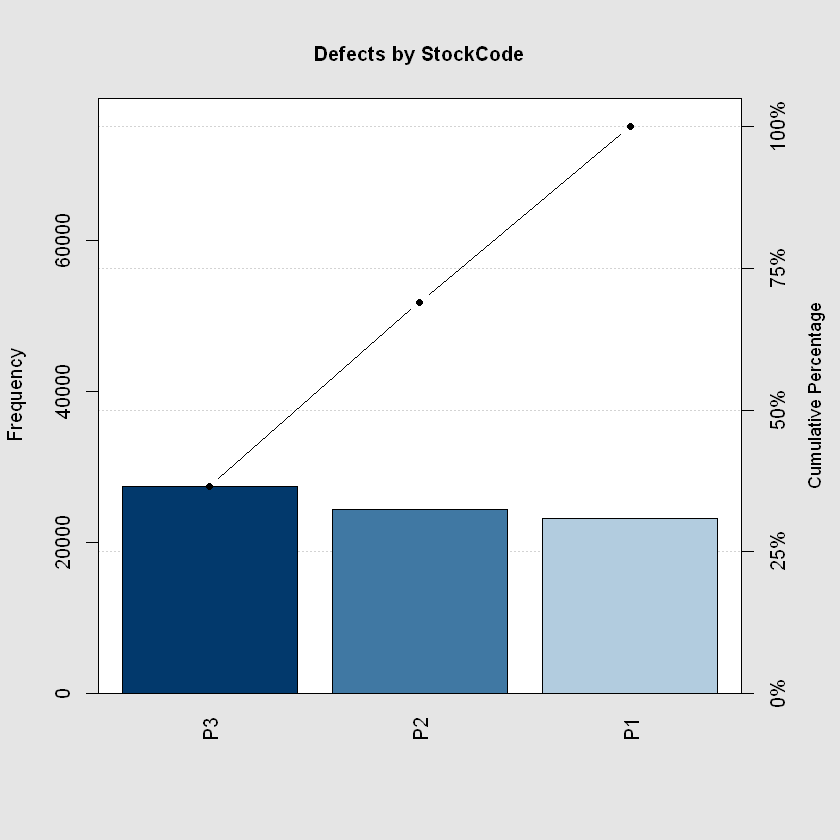

In [4]:
# Pareto chart
groupedData <- aggregate(myData$Defects, by=list(StockCode=myData$StockCode), FUN=sum)
names(groupedData)[2] <- "Defects"
defectCount <- groupedData$Defects
names(defectCount) <- groupedData$StockCode
pareto.chart(defectCount, main="Defects by StockCode")

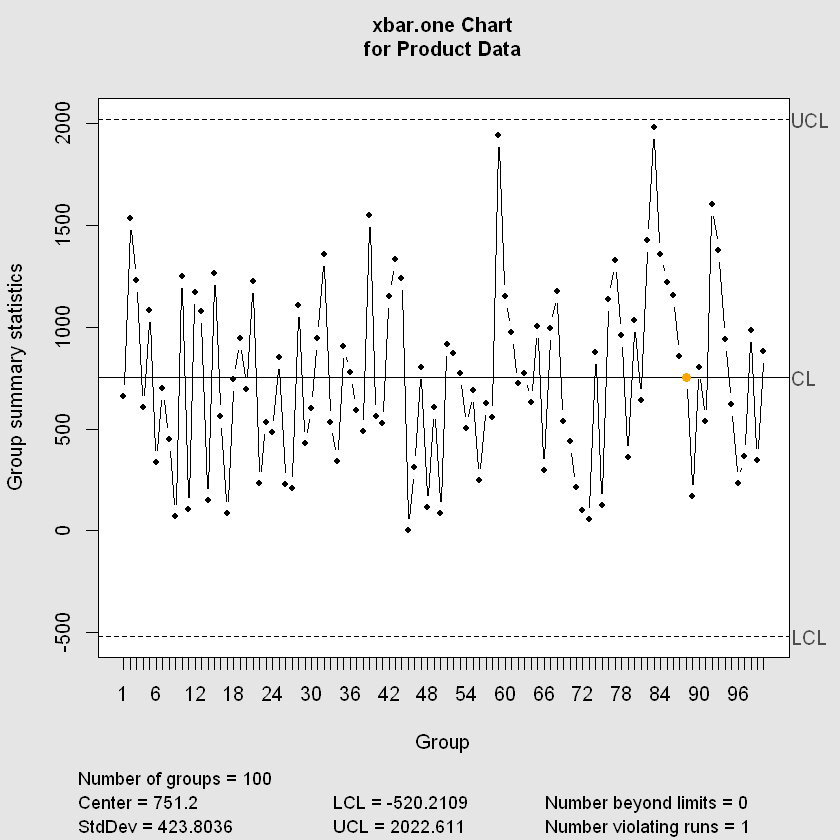

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$Defects, data.name="Product Data", type="xbar.one", nsigmas=3)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(200, 600),     breaks = 20)

Number of obs = 100          Target = 400
       Center = 751.2           LSL = 200
       StdDev = 423.8           USL = 600

Capability indices:

        Value      2.5%    97.5%
Cp     0.1573   0.13541   0.1792
Cp_l   0.4335   0.35887   0.5082
Cp_u  -0.1189  -0.06236  -0.1755
Cp_k  -0.1189  -0.05152  -0.1863
Cpm    0.1211   0.10124   0.1410

Exp<LSL 9.7%	 Obs<LSL 11%
Exp>USL 64%	 Obs>USL 61%


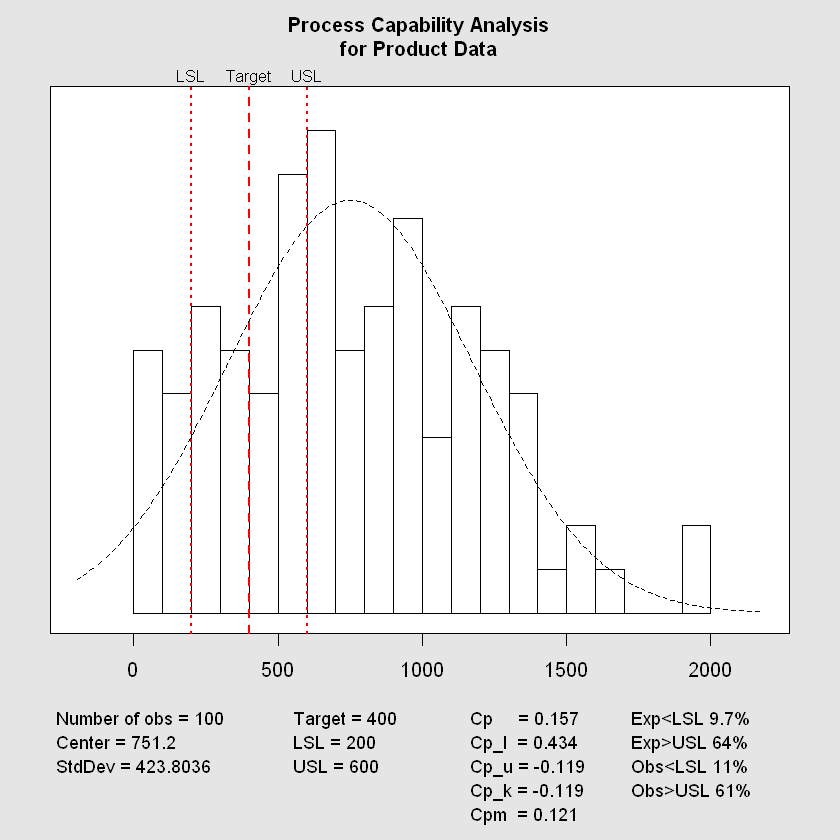

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(200, 600), breaks=20,)

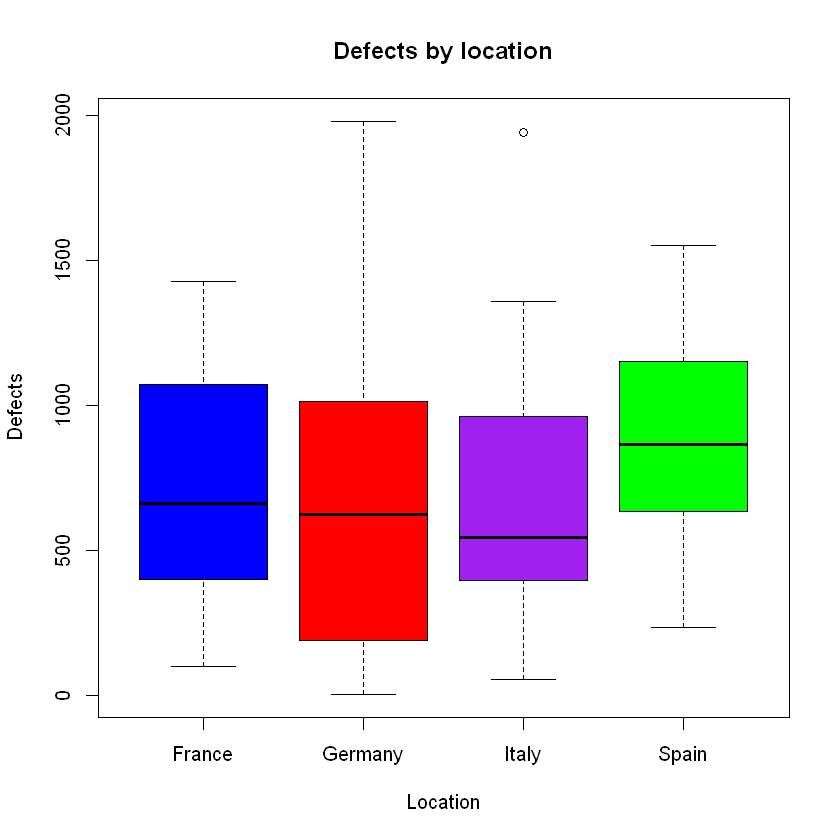

In [7]:
# Boxplot of defects by location
boxplot(data=myData, Defects ~ Location, 
        col = c("blue", "red", "purple", "green"),
        ylab = "Defects",
        main = "Defects by location")

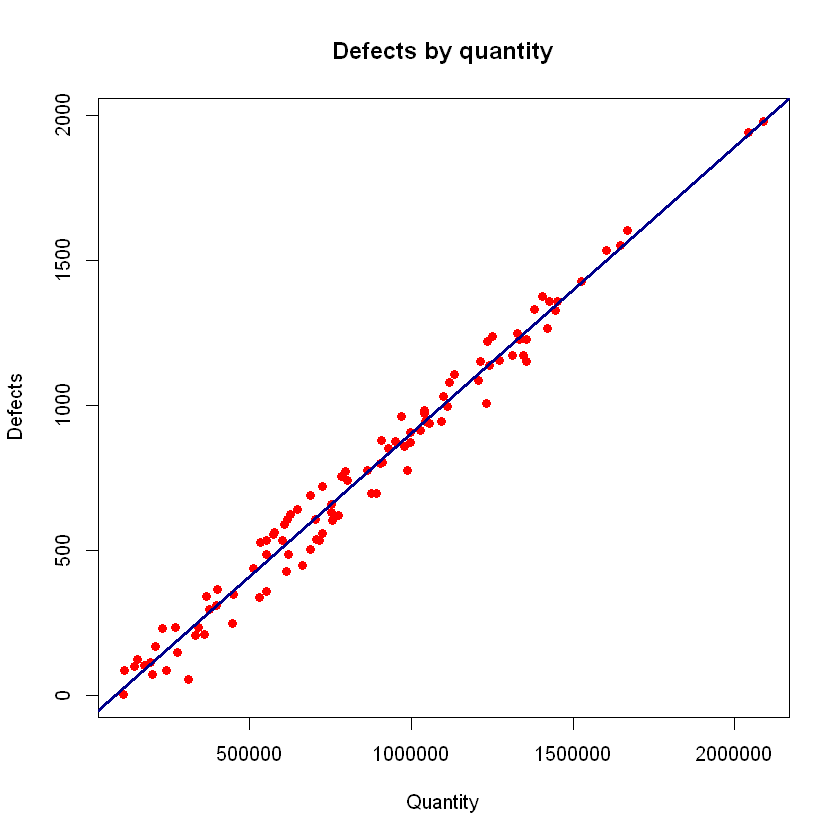

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantity",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

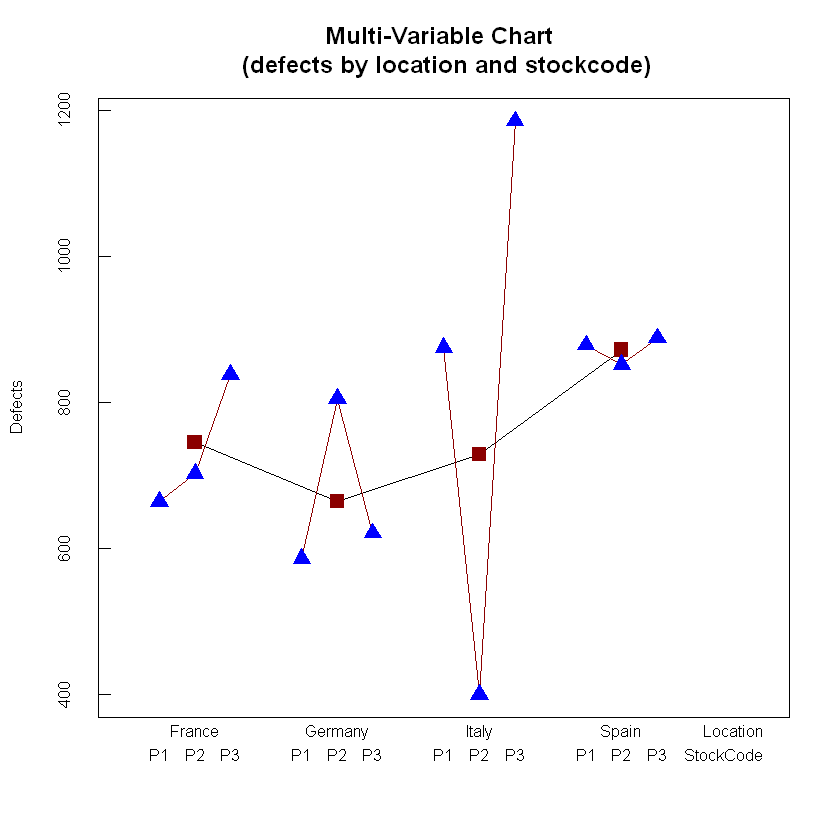

In [9]:
# Multivari chart of defects by location and stockcode
multivari("Defects",                          # Response 
          "Location", "StockCode",            # Factors  
          data = myData,                      # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 2,
          legend = FALSE,
          cex = 0.8,
          main = "Multi-Variable Chart \n (defects by location and stockcode)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Location, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Location     3   567752  189251    0.98  0.405
Residuals   96 18535374  193077               

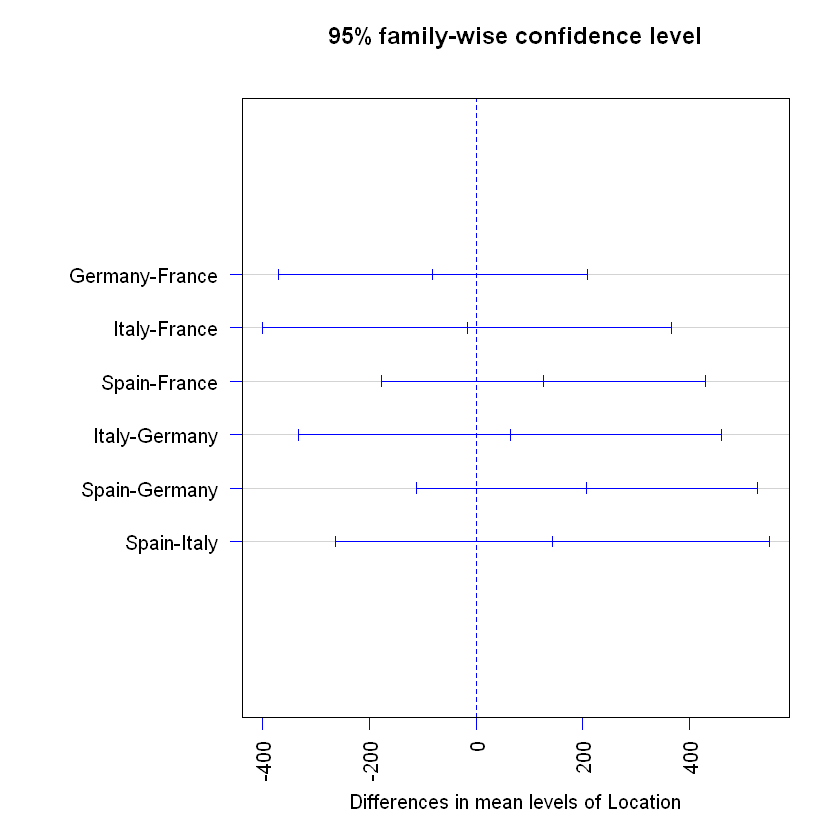

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest